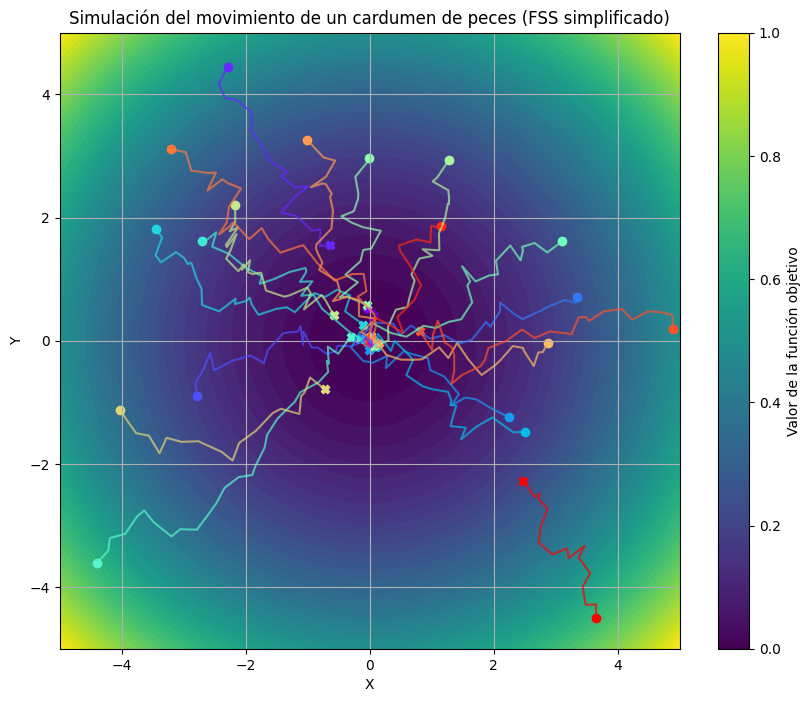

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Función objetivo (función Sphere)
def objective(x, y):
    return x**2 + y**2

# Parámetros del algoritmo
n_peces = 20        # Número de peces (soluciones)
dim = 2             # Dimensión del problema
n_iter = 50         # Número de iteraciones
limites = [-5, 5]   # Límites del espacio de búsqueda
paso = 0.3          # Magnitud del movimiento

# Inicialización aleatoria de las posiciones de los peces
posiciones = np.random.uniform(limites[0], limites[1], (n_peces, dim))

# Guardar trayectorias para visualización
trayectorias = [posiciones.copy()]

# Bucle principal del algoritmo (simplificado)
for _ in range(n_iter):
    nuevas_posiciones = []
    for i in range(n_peces):
        movimiento = np.random.uniform(-paso, paso, dim)
        nueva_pos = posiciones[i] + movimiento
        # Aceptar si mejora el valor de la función objetivo
        if objective(*nueva_pos) < objective(*posiciones[i]):
            nuevas_posiciones.append(nueva_pos)
        else:
            nuevas_posiciones.append(posiciones[i])
    posiciones = np.array(nuevas_posiciones)
    trayectorias.append(posiciones.copy())

# Visualización de las trayectorias
X, Y = np.meshgrid(np.linspace(limites[0], limites[1], 100),
                   np.linspace(limites[0], limites[1], 100))
Z = objective(X, Y)

plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
colors = plt.cm.rainbow(np.linspace(0, 1, n_peces))

# Dibujar las trayectorias de cada pez
for i in range(n_peces):
    tray = np.array([t[i] for t in trayectorias])
    plt.plot(tray[:, 0], tray[:, 1], color=colors[i], alpha=0.7)
    plt.scatter(tray[0, 0], tray[0, 1], color=colors[i], marker='o')  # posición inicial
    plt.scatter(tray[-1, 0], tray[-1, 1], color=colors[i], marker='X')  # posición final

plt.title("Simulación del movimiento de un cardumen de peces (FSS simplificado)")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(label="Valor de la función objetivo")
plt.grid(True)
plt.show()
